In [1]:
from zlib import crc32
import numpy as np

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'}, 
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'}, 
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'}, 
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'}, 
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'}, 
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия', 
                          'Нейронная сеть (Перцептрон)', 
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия', 
                              'Нейронная сеть (Перцептрон)', 
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод парзеновского окна', 
                              'SVM']}
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(methods[task['type']], size=2, replace=False).tolist()

task

Enter your mail: kristinagurtov@yandex.ru


{'mail': 'kristinagurtov@yandex.ru',
 'id': 834328568,
 'type': 'classification',
 'dataset': {'name': 'Spambase Data Set',
  'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
 'method': ['k-ближайших соседей', 'Нейронная сеть (Перцептрон)']}

In [2]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [3]:
def print_conf_matrix(expected, predicted):
    classes = np.unique(expected)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(expected)):
        if expected[i] == classes[1]:
            if expected[i] == predicted[i]:
                TN += 1
            else:
                FN += 1
        else:
            if expected[i] == predicted[i]:
                TP += 1
            else:
                FP += 1
    print(f' {TP}  {FP}\n {FN} {TN}')

In [4]:
def clf_accuracy(expected, predicted):
    correct = 0
    for i in range(len(expected)):
        if expected[i] == predicted[i]:
            correct += 1
    return correct/len(expected)

def clf_precision(expected, predicted):
    classes = np.unique(expected)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(expected)):
        if expected[i] == classes[1]:
            if expected[i] == predicted[i]:
                TN += 1
            else:
                FN += 1
        else:
            if expected[i] == predicted[i]:
                TP += 1
            else:
                FP += 1
    return TP/(TP+FP), TN/(TN+FN)

def clf_recall(expected, predicted):
    classes = np.unique(expected)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(expected)):
        if expected[i] == classes[1]:
            if expected[i] == predicted[i]:
                TN += 1
            else:
                FN += 1
        else:
            if expected[i] == predicted[i]:
                TP += 1
            else:
                FP += 1
    return TP/(FN+TP), TN/(TN+FP)

# SpamBase dataset
## Description:
SPAM E-MAIL DATABASE ATTRIBUTES<br>
<br>
48 continuous real [0,100] attributes of type <b>word_freq_WORD</b> = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail.  A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.<br>
<br>
6 continuous real [0,100] attributes of type <b>char_freq_CHAR</b> = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail<br>
<br>
1 continuous real [1,...] attribute of type <b>capital_run_length_average</b> = average length of uninterrupted sequences of capital letters<br>
<br>
1 continuous integer [1,...] attribute of type <b>capital_run_length_longest</b> = length of longest uninterrupted sequence of capital letters<br>
<br>
1 continuous integer [1,...] attribute of type <b>capital_run_length_total</b> = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail<br>
<br>
1 nominal {0,1} class attribute of type <b>spam</b> = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  <br>
<br>
For more information, see file 'spambase.DOCUMENTATION' at the UCI Machine Learning Repository: http://www.ics.uci.edu/~mlearn/MLRepository.html<br>

In [5]:
df = pd.read_csv('spambase_dataset.csv')
#df = df.drop_duplicates(subset=list(df.columns)[:-1])
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6]:
df['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

In [7]:
X = np.array(df.iloc[:, :-1]) #dataset
y = np.array(df[['class']]).ravel() #labels

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #perform split on train/test set

Далее описаны методы стандартизации и minmax. По итогу я делаю стандартизацию, так как на ней получилось лучшая точность.

In [9]:
class StandardScaler(object):
    def __init__(self):
        self.mean = 0
        self.std = 1
    
    def fit(self, data):
        self.mean = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        return (data-self.mean)/self.std
    
    def transform(self, data):
        return (data-self.mean)/self.std

In [10]:
class MinMaxScaler(object):
    def __init__(self):
        self.max = 1
        self.min = 0
        
    def fit(self, data):
        self.max = np.max(data, axis=0)
        self.min = np.min(data, axis=0)
        return (data - self.min)/(self.max-self.min)
    
    def transform(self, data):
        return (data - self.min)/(self.max-self.min)

In [11]:
'''minmax = MinMaxScaler()
X_train = minmax.fit(X_train)
X_test = minmax.transform(X_test)'''

'minmax = MinMaxScaler()\nX_train = minmax.fit(X_train)\nX_test = minmax.transform(X_test)'

In [12]:
stand = StandardScaler()
X_train = stand.fit(X_train)
X_test = stand.transform(X_test)

# Попытка визуализации
Я решила написать метод PCA для уменьшения размерности чтобы визуализировать данные. (теория и реализация в питоне взято из книги Sebastian Rashka Python Machine Learning)

In [13]:
cov_mat = np.cov(X_train.T)

In [14]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Eigen values", eigen_vals)
print(eigen_vals.shape)

Eigen values [6.60837346e+00 3.33351757e+00 2.10362630e+00 1.64609647e+00
 5.94547911e-03 1.53794496e+00 1.31457119e-01 1.45781586e+00
 2.02421074e-01 1.41570066e+00 2.40310190e-01 1.36363048e+00
 1.29344052e+00 3.42386244e-01 3.63871270e-01 4.16976951e-01
 4.21986757e-01 4.41869996e-01 1.24975783e+00 4.73804541e-01
 1.22230548e+00 5.13656561e-01 5.44875043e-01 5.63754134e-01
 1.15660123e+00 5.95552413e-01 6.08672349e-01 1.12617922e+00
 6.44877795e-01 6.63985102e-01 6.80285493e-01 7.01399117e-01
 7.21563537e-01 7.39218170e-01 7.57650238e-01 7.69759274e-01
 7.81670457e-01 8.00341847e-01 1.08245857e+00 1.07496068e+00
 1.05984849e+00 8.38039574e-01 8.55112189e-01 8.65647683e-01
 8.81471300e-01 9.06467921e-01 9.22410984e-01 1.03104860e+00
 9.44296256e-01 1.01820002e+00 1.00566662e+00 1.00347381e+00
 9.94249803e-01 9.85599801e-01 9.63535709e-01 9.67910445e-01
 9.74027718e-01]
(57,)


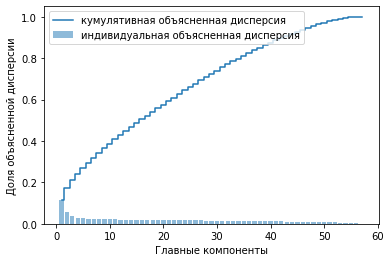

In [15]:
tot = sum (eigen_vals) 
var_exp = [(i/tot) for i in sorted(eigen_vals , reverse=True)] 
cum_var_exp = np.cumsum(var_exp) 
plt.bar(range(1, 58), var_exp, alpha=0.5, 
        align= 'center', label = 'индивидуальная объясненная дисперсия')
plt.step(range(1, 58), cum_var_exp, where='mid', 
         label='кумулятивная объясненная дисперсия')

plt.ylabel('Дoля объясненной дисперсии') 
plt.xlabel ('Главные компоненты')

plt.legend(loc='upper left') 
plt.show()

Здесь из графика видно, что на первый признак приходится около 10% от всей дисперсии. Поэтому уменьшение размерности в данном случае слишком обощит данные и многие важные признаки уберутся. Поэтому метод PCA не подходит для визуализации таких данных. Тем не менее, я решила доделать метод чтобы потренироваться в визуализации данных. 

In [16]:
eigen_pairs =[(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))] 
eigen_pairs.sort(reverse=True)
w = np.hstack((eigen_pairs[0][1][ :, np.newaxis], eigen_pairs[1][1][ :, np.newaxis], eigen_pairs[2][1][ :, np.newaxis]))

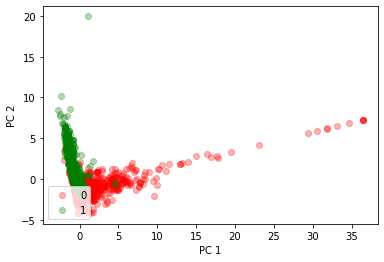

In [17]:
X_train_pca = X_train.dot(w)
colors = ['r', 'g']
for l, c in zip(np.unique(y_train), colors):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, alpha=.3)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# K nearest neighbours
Реализация класса k ближайщих соседей: <br>
В методе fit происходит обучение ("ленивое" обучение) - просто сохраняем данные о наших точках. <br>
В методе predict происходит предсказывание - из сохраненного тренировочного набора мы находим k ближайщих точек и выбираем среднее из значения их классов. 

In [18]:
class KNN(object):
    def __init__(self, k_neighbours=1, p=2):
        self.k_neighbours = k_neighbours
        self.p = p
        
    def fit(self, train_data, train_labels):
        self.train_data = np.array(train_data)
        self.train_labels = np.array(train_labels)
        
    def dist(self, point1, point2):
        return np.sum(abs(point1-point2)**self.p, axis=1)**(1/self.p)
    
    def predict(self, pred_data):
        pred_data = np.array(pred_data)
        pred_label = np.array([])
        for elem in pred_data:
            distances = self.dist(self.train_data, elem)
            closest_idx = np.argsort(distances)[:self.k_neighbours]
            pred_label = np.append(pred_label, np.round(np.sum(self.train_labels[closest_idx])/self.k_neighbours))
        return pred_label

Подбор гиперпараметров

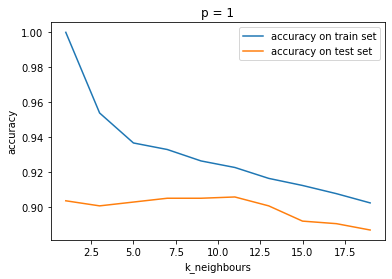

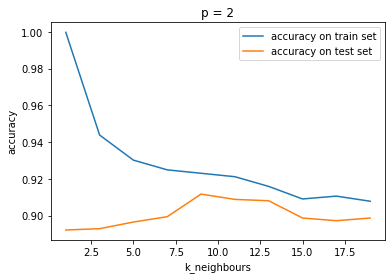

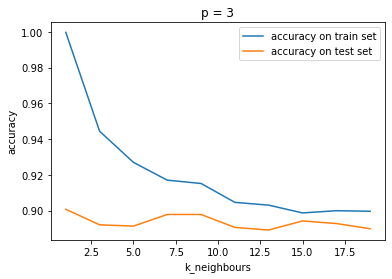

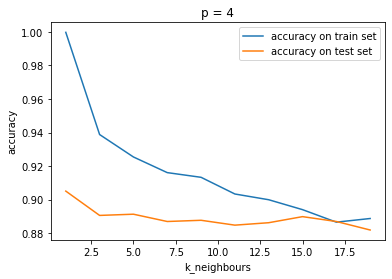

In [19]:
k_neighbours = [i for i in range(1, 20, 2)]
ps = [1, 2, 3, 4]
for p in ps:
    acc = []
    acc_train = []
    prec_pos = []
    prec_neg = []
    rec_pos = []
    rec_neg = []
    for k_neighbour in k_neighbours:
        clf = KNN(k_neighbours=k_neighbour, p=p)
        clf.fit(X_train, y_train)
        expected = y_test
        predicted = clf.predict(X_test)
        acc.append(clf_accuracy(expected, predicted))
        acc_train.append(clf_accuracy(y_train, clf.predict(X_train)))
        # rec_pos.append(clf_recall(expected, predicted)[0])
        # rec_neg.append(clf_recall(expected, predicted)[1])
        # prec_pos.append(clf_precision(expected, predicted)[0])
        # prec_neg.append(clf_precision(expected, predicted)[1])
    plt.plot(k_neighbours, acc_train, label='accuracy on train set')
    plt.plot(k_neighbours, acc, label='accuracy on test set')
    # plt.plot(k_neighbours, prec_pos, label=f'pos precision with p = {p}')
    # plt.plot(k_neighbours, prec_neg, label=f'neg precision with p = {p}')
    # plt.plot(k_neighbours, rec_pos, label=f'pos recall with p = {p}')
    # plt.plot(k_neighbours, rec_neg, label=f'neg recall with p = {p}')
    plt.legend()
    plt.xlabel('k_neighbours')
    plt.ylabel('accuracy')
    plt.title(f'p = {p}')
    plt.show()

Наилучшая конфигурация - k_neighbours = 9, p = 2 (евклидово расстояние). <br>

In [20]:
k = KNN(9, p=2)
k.fit(X_train, y_train)
expected = y_test
predicted = k.predict(X_test)

In [22]:
print_conf_matrix(expected, predicted)
print("Accuracy: {0:.2f}".format(clf_accuracy(expected, predicted)))

 765  39
 83 494
Accuracy: 0.91


In [23]:
print_conf_matrix(y_train, k.predict(X_train))
print("Accuracy: {0:.2f}".format(clf_accuracy(y_train, k.predict(X_train))))

 1881  103
 145 1091
Accuracy: 0.92


# Perceptron
Реализация модели Perceptron - Нейронная сеть с одним скрытым слоем. Реализация была взята с семинаров (в качестве домашки как раз была реализация методов нейронной сети - forward pass и backpropagation). 

In [24]:
class Perceptron(object):
    def __init__(self, input_layer_size=400, hidden_layer_size=25, num_labels=2, lambda_=1., max_iter=100):
        self.input_layer_size = input_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.num_labels = num_labels
        self.lambda_ = lambda_
        self.max_iter = max_iter
        
    def sigmoid(self, z):
        eps = 0.00001
        if type(z) == np.ndarray:
            z[z > 20] = 20
            z[z < -20] = -20
        else:
            z = 20 if z > 20 else z
            z = -20 if z < -20 else z
        sigm = 1/(1+np.exp(-z))
        if type(sigm) == np.ndarray:
            sigm[sigm < eps] = eps
            sigm[sigm > 1-eps] = 1-eps
        else:
            sigm = eps if sigm < eps else sigm
            sigm = 1-eps if sigm > 1-eps else sigm
        return sigm
    
    
    def sigmoid_grad(self, z):
        g = np.zeros(z.shape)
        g = self.sigmoid(z)*(1-self.sigmoid(z))
        return g
    
        
    def cost_function(self, nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):
        Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                            (hidden_layer_size, (input_layer_size + 1)))
        Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                            (num_labels, (hidden_layer_size + 1)))
        m = y.size
        J = 0
        Theta1_grad = np.zeros(Theta1.shape)
        Theta2_grad = np.zeros(Theta2.shape)
        
        I = np.eye(num_labels)
        Y = np.zeros((m, num_labels))
        for i in range(m):
            Y[i, :] = I[y[i], :]
        A1 = np.concatenate([np.ones((m, 1)), X], axis=1)
        Z2 = np.dot(A1, Theta1.T)
        A2 = np.concatenate([np.ones((Z2.shape[0], 1)), self.sigmoid(Z2)], axis=1)
        Z3 = np.dot(A2, Theta2.T)
        A3 = self.sigmoid(Z3)

        J = (1/m)*np.sum(np.sum(-1*Y*np.log(A3) - (1-Y)*np.log(1-A3)))
        pen = lambda_/(2*m)*(np.sum(np.sum(Theta1[:, 1:]**2)) + np.sum(np.sum(Theta2[:, 1:]**2)))
        
        J = J + pen
    
        sigma3 = A3-Y
        tmp_arr = np.concatenate([np.ones((Z2.shape[0], 1)), Z2], axis=1)
        sigma2 = np.dot(sigma3, Theta2)*(self.sigmoid(tmp_arr)*(1-self.sigmoid(tmp_arr)))
        sigma2 = sigma2[:, 1:]
        
        delta1 = np.dot(sigma2.T, A1)
        delta2 = np.dot(sigma3.T, A2)

        Theta1_grad = 1/m*delta1
        Theta2_grad = 1/m*delta2
                        
        theta1_pen = lambda_/m*np.concatenate([np.zeros((Theta1.shape[0], 1)), Theta1[:, 1:]], axis=1)
        theta2_pen = lambda_/m*np.concatenate([np.zeros((Theta2.shape[0], 1)), Theta2[:, 1:]], axis=1)

        Theta1_grad = Theta1_grad + theta1_pen
        Theta2_grad = Theta2_grad + theta2_pen
        
        grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])
        
        return J, grad

    def randinitweights(self, L_in, L_out, epsilon_init=0.12):
        W = np.zeros((L_out, 1 + L_in))
        W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
        return W
        
    def fit(self, train_data, train_labels):
        self.input_layer_size = train_data.shape[1]
        self.num_labels = len(np.unique(train_labels))
        options= {'maxiter': self.max_iter}
        
        init_theta1 = self.randinitweights(self.input_layer_size, self.hidden_layer_size)
        init_theta2 = self.randinitweights(self.hidden_layer_size, self.num_labels)
        
        initial_nn_params = np.concatenate([init_theta1.ravel(), init_theta2.ravel()], axis=0)
        
        costfunc = lambda p: self.cost_function(p, self.input_layer_size,
                                            self.hidden_layer_size,
                                            self.num_labels, train_data, train_labels, self.lambda_)
        
        res = optimize.minimize(costfunc, initial_nn_params, jac=True, method='TNC', options=options)
        
        nn_params = res.x
        self.theta1 = np.reshape(nn_params[:self.hidden_layer_size * (self.input_layer_size + 1)],
                        (self.hidden_layer_size, (self.input_layer_size + 1)))
        self.theta2 = np.reshape(nn_params[(self.hidden_layer_size * (self.input_layer_size + 1)):],
                        (self.num_labels, (self.hidden_layer_size + 1)))
        
    def predict(self, test_data):
        m = test_data.shape[0]
        num_labels = self.theta2.shape[0]

        p = np.zeros(m)
        h1 = self.sigmoid(np.dot(np.concatenate([np.ones((m, 1)), test_data], axis=1), self.theta1.T))
        h2 = self.sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), self.theta2.T))
        p = np.argmax(h2, axis=1)
        return p

Подбор гиперпараметров

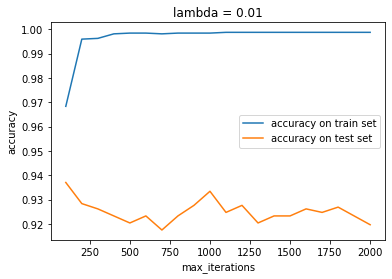

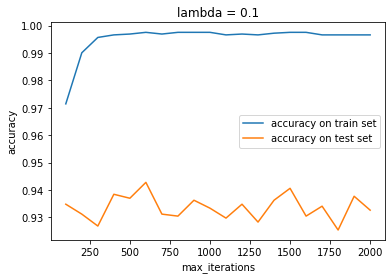

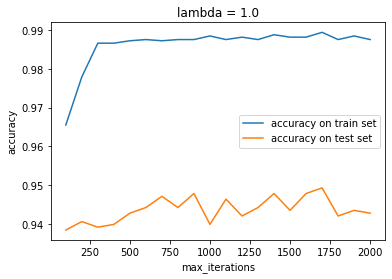

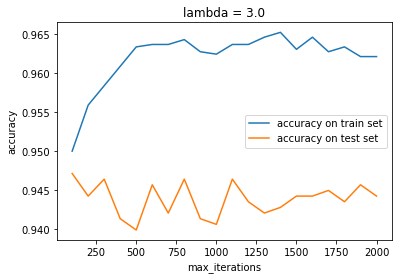

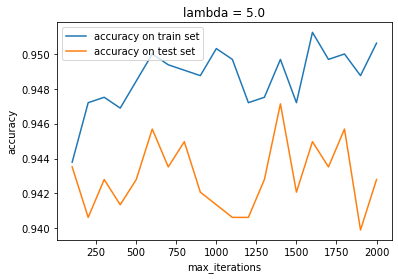

In [25]:
max_iters = [i*100 for i in range(1, 21)]
lambdas = [0.01, 0.1, 1., 3., 5.]
for lambda_ in lambdas:
    acc_test = []
    acc_train = []
    for max_iter in max_iters:
        clf = Perceptron(max_iter=max_iter, lambda_=lambda_)
        clf.fit(X_train, y_train)
        expected = y_test
        predicted = clf.predict(X_test)
        acc_test.append(clf_accuracy(expected, predicted))
        acc_train.append(clf_accuracy(y_train, clf.predict(X_train)))
    plt.plot(max_iters, acc_train, label='accuracy on train set')
    plt.plot(max_iters, acc_test, label='accuracy on test set')
    plt.legend()
    plt.xlabel('max_iterations')
    plt.ylabel('accuracy')
    plt.title(f'lambda = {lambda_}')
    plt.show()

По графикам - лучшая точность при lambda = 0.1 на 1000 итерации.

In [26]:
p = Perceptron(max_iter=1000, lambda_=0.1)
p.fit(X_train, y_train)
expected = y_test
predicted = p.predict(X_test)

In [27]:
print_conf_matrix(expected, predicted)
print("Accuracy: {0:.2f}".format(clf_accuracy(expected, predicted)))

 762  42
 39 538
Accuracy: 0.94


In [28]:
print_conf_matrix(y_train, p.predict(X_train))
print("Accuracy: {0:.2f}".format(clf_accuracy(y_train, p.predict(X_train))))

 1984  0
 11 1225
Accuracy: 1.00


Таким образом, модель Perceptron показала себя немного лучше чем KNN. В принципе я так и ожидала, что нейронная сеть будет лучше, так как она более сложная модель и пытается подобрать функцию для нашего датастета, в то время как метод ближайщих соседей просто ищет расстояния до тренировочной выборки. <br><br>
Что еще интересно: <br>
Стандартизация сильно улучшила точность классификаторов; <br>
Несмотря на то, что точность на нейронной сети больше, она больше всего на пару процентов. <br>
